In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from res.modules import testTrainSplit

In [2]:
class LogisticReg(object):
    """
    Logistic Regression Classifier Class:
    Attributes - 
        1) W - model Parameters
    
    Methods - 
        1) fit - executes learning algorithm on given training data and sets model 
                 parameters
        2) Predict - Predicts class label given attribute set.
    """
    def __init__(self):
        self.W = None
        
    def logisticFunc(self, x):
        return 1 / (1 + np.exp(-x))
    
    def model(self, X):
        S = np.dot(self.W,X)
        prediction = self.logisticFunc(S)
        return prediction
    
    def predict(self, Xdata):
        """
        Input:  Xdata - numpy array of shape [examples, 1+attributes]
                        where first column in attributes is all ones (dummy feature)
        Output: Predicted probability of Class 1
        """
        yPred = []
        for X in Xdata:
            yPred.append(self.model(X))    
        return yPred
    
    def fit(self, xData, yData, eta = 0.1, epoch = 1000):
        """
        Input:  xData - input training examples 
                        numpy array of shape [examples, 1+attributes]
                        where first column in attributes is all ones (dummy feature)
                yData - numpy array with actual labels 
                        expects Two unique labels positive as 1 and Negative as -1
                eta   - Learning rate for gradient discent 
                epochs- maximum number of iteraions
        
        This functions runs the learning algorithm and sets the model weights
        """
        
        if self.W is None:
            self.W = np.zeros(xData.shape[1])
    
        for iter in range(epoch):    
            delW = 0
            for Xn, yn in zip(xData, yData):
                yS = yn * np.dot(self.W, Xn)
                delW = delW + yn/(1 + np.exp(yS)) * Xn
            delW = -1/xData.shape[0] * delW
            
            self.W = self.W - eta * delW

In [3]:
# dataset url
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29
data = pd.read_csv('./data/breastCancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
xData = data.iloc[:,2:data.shape[1]-1]
yData = data.iloc[:,1]

In [5]:
# Normalising data to [0, 1]
xData = np.apply_along_axis(lambda x: (x-min(x))/(max(x)-min(x)), axis=0, arr=xData.values)

# dummy attribute column curresponding to bias
x0 = np.ones((xData.shape[0], 1))
xData = np.concatenate((x0, xData), axis = 1)

examples, attributes = xData.shape

In [6]:
labels = yData.unique()
labels

array(['M', 'B'], dtype=object)

In [7]:
class1, class2 = labels

In [8]:
replaceDict = {class1:-1, class2:1}
yData.replace(replaceDict, inplace= True)

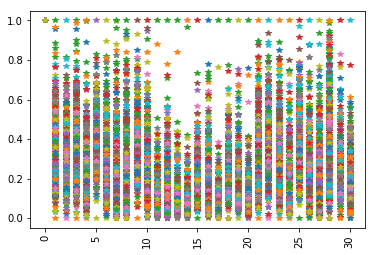

In [9]:
plt.plot(xData.T,'*')
plt.xticks(rotation = 'vertical')
plt.show()

In [10]:
lrModel = LogisticReg()

In [11]:
xTest, xTrain, yTest, yTrain = testTrainSplit(xData, yData)

In [12]:
lrModel.fit(xTrain, yTrain)

In [13]:
yPred = lrModel.predict(xTest) 

In [14]:
# examples with Class 1 probability greater than 0.5
yPr = np.array(yPred) > 0.5 

In [15]:
# Actual examples with class 1
yActy = (np.array(yTest) == 1)

In [16]:
print(f'Accuracy of prediction is: {np.average(yActy == yPr)}')

Accuracy of prediction is: 0.9734513274336283
